# Todo un reto intelectual. 

    Ahora viene una parte retadora para mí. Ya tenemos bastante: por cada estación de metro, tenemos en qué ranking está, qué tan segura es, cuánta gente en promedio la visita al día, a qué colonia pertenece, qué tan segura es esa colonia, etc. Ahora falta la cereza del pastel: ¿a qué horas es más peligrosa esa estación? 

Partiremos de la combinación de la base de datos de delitos con la de las estaciones para empezar el proceso.

In [1]:
import numpy as np
import pandas as pd
import re

In [5]:
estaciones_por_crimen = pd.read_csv('sublime_775_000.csv')
delitos = pd.read_csv('delitos_limpio_v1.csv')
data = pd.concat([delitos.iloc[:775000], estaciones_por_crimen], axis=1) #junto ambas partes.
data = data.drop(columns=['Unnamed: 0', 'index', 'calle_hechos', 'longitud', 'latitud', 'geo_punto', 
                          'stop_lat', 'stop_lon', 'alcaldia_hechos'])
data.head(3) 

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
0,2018.0,Abril,2018-04-13 13:30:00,ROBO DE DOCUMENTOS,DELITO DE BAJO IMPACTO,POLANCO,Polanco,Metro 7,Ninguna,Ninguna,Ninguna
1,2016.0,Agosto,2016-08-05 16:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,PLAZA COAPA,Lomas Estrella,Metro 12,Ninguna,Ninguna,Ninguna
2,2015.0,Octubre,2015-10-23 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,DOCTORES,Niños Héroes_1,Metro 3,Ninguna,Ninguna,Ninguna


In [6]:
data = data.drop(columns=['año_hechos', 'mes_hechos'])

# Paso 1. Analizar los horarios más seguros por estación. 

    Para lograr esto primero necesito concentrarme únicamente en los delitos que entren en la categoría de "robo a pasajero a bordo del metro con y sin violencia". 

In [8]:
data = data[data.categoria_delito=='ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA']
data.shape 

(5406, 9)

Veamos si podemos añadir una columna donde se muestre únicamente la hora. 

In [12]:
data.fecha_hechos = pd.to_datetime(data.fecha_hechos)
data.head()

,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
42,2016-08-04 14:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna
205,2018-04-24 22:00:00,ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna
210,2008-04-24 07:45:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna
243,2015-12-15 09:30:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna
498,2018-01-20 16:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna


In [13]:
#las estaciones con violencia merecen una ponderación distinta
data.delito = data.delito.apply(lambda x: 1 if x== "ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA" else 2)

In [14]:
data.head(3)

,fecha_hechos,delito,categoria_delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
42,2016-08-04 14:00:00,1,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna
205,2018-04-24 22:00:00,2,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna
210,2008-04-24 07:45:00,1,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna


In [24]:
print(data.fecha_hechos[42].hour)
#bien, así podemos acceder a la hora. 

14


In [28]:
def get_hours(x):
    """Esta función es para extraer únicamente la hora de cada registro."""
    hour = x.hour
    return hour

In [29]:
data['hora_del_crimen'] = data.fecha_hechos.apply(get_hours)

In [30]:
data['hora_del_crimen'].value_counts() #wuju! horas más peligrosas!

8     609
19    509
18    461
15    428
7     422
14    375
9     351
16    333
20    270
13    262
17    261
10    215
12    191
11    164
6     160
21    128
22     72
23     50
5      45
2      26
4      25
0      19
1      15
3      15
Name: hora_del_crimen, dtype: int64

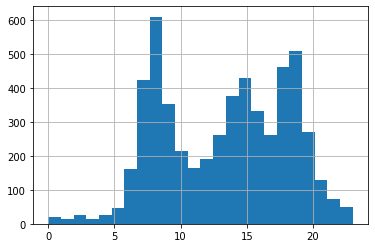

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
data['hora_del_crimen'].hist(bins=24);

In [37]:
#Por ahora podemos dejar algunas columnas para concentrarnos en la hora nada más
data = data.drop(columns=['categoria_delito'])

data.head()

,fecha_hechos,delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion,hora_del_crimen
42,2016-08-04 14:00:00,1,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,14
205,2018-04-24 22:00:00,2,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna,22
210,2008-04-24 07:45:00,1,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna,7
243,2015-12-15 09:30:00,1,CENTRO,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna,9
498,2018-01-20 16:00:00,1,CENTRO,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna,16


In [49]:
data = data.reset_index() #necesito hacer si quiero que funcione el iloc luego

In [51]:
data= data.drop(columns=['index'])
data.head(2)

,fecha_hechos,delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion,hora_del_crimen
0,2016-08-04 14:00:00,1,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,14
1,2018-04-24 22:00:00,2,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna,22


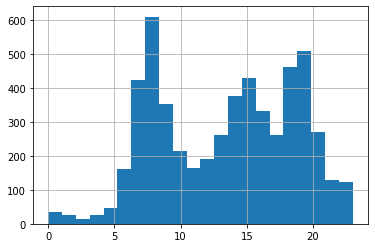

In [88]:
data.hora_del_crimen.hist(bins=22);

# Paso 2: Ver cuáles son las horas más peligrosas para cada estación. 

    Este tipo de problema me gusta resolverlos de la siguiente forma: primero me atrabanco y me tropiezo intentando responder esta pregunta para 1 caso en particular, y luego veo cómo generalizarlo. Entonces primero intentaré ver el mecanismo para descubrir las horas más peligrosas para una estación en particular y luego generalizaré ese procedimiento de forma más limpia y eficiente.

In [38]:
#Tomemos la estación 'Zócalo' como punto de partida. ¿Cómo encontrar las horas más peligrosas para la estación?
#podríamos primero segmentar la base de datos

data_zocalo = data[data.nombre_estacion == 'Zócalo']
data_zocalo.shape

(254, 9)

In [86]:
#Para una estación en particular, el procedimiento sería relativamente sencillo con el método value_counts
data_zocalo.hora_del_crimen.value_counts()

15    38
14    34
18    31
16    27
19    24
17    20
13    15
20     9
10     9
12     7
11     7
7      6
4      6
9      5
2      5
3      3
1      3
8      3
21     2
Name: hora_del_crimen, dtype: int64

In [47]:
#si ponemos el índice de ese vaue counts en una lista podríamos ver las top 3 horas más peligrosas 
#en realidad creo que para el usuario sería mejor nada más ver las top 3 horas más peligrosas. 

lista_zocalo = list(data_zocalo.hora_del_crimen.value_counts().index)[:3]
lista_zocalo 


[15, 14, 18]

## Tiempo de Generalizar. 

    Ya me di una idea de cómo abordar el problema. Con el método map de Pandas, en donde usamos convenientemente los diccionarios para asignar valores a otra columna, podemos hacer algo útil. 

In [62]:
lista_horas = [] #será una lista de listas, en donde cada una tiene las top 3 horas más peligrosas. 
dict_estaciones = {} #el key será el nombre de la estación y el value la lista de la estación
for i in range(len(data)):
    
    dict_estaciones[data.iloc[i, 3]] = sorted(list(data[data.nombre_estacion == data.iloc[i, 3]].hora_del_crimen.value_counts().index)[:3])
    
    

In [63]:
dict_estaciones['Zócalo'] #podemos ver que el método funciona!

[14, 15, 18]

Ahora es tiempo de agregar estas horas a una nueva columna, llamada "horas_mas_peligrosas". Aquí es cuando el 
método map demuestra su poder. 

In [64]:
data['horas_mas_peligrosas'] = data.nombre_estacion.map(dict_estaciones)
data.head()
#ver de nuevo "Zócalo" en el quinto renglón; las horas se indican correctamente ([14,15,18])
#están en distinto orden porque usé "sorted" para ordenarlas de más temprano a más tarde. 

,fecha_hechos,delito,colonia_hechos,nombre_estacion,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion,hora_del_crimen,horas_mas_peligrosas
0,2016-08-04 14:00:00,1,CENTRO,Pino Suárez_1,Metro 2,Metro 1,Ninguna,Ninguna,14,"[14, 15, 16]"
1,2018-04-24 22:00:00,2,TACUBA,Tacuba_1,Metro 2,Metro 7,Ninguna,Ninguna,22,"[8, 12, 19]"
2,2008-04-24 07:45:00,1,TACUBAYA,Tacubaya_1_3,Metro 9,Metro 1,Metro 7,Ninguna,7,"[18, 19, 20]"
3,2015-12-15 09:30:00,1,CENTRO,Balderas_1_2,Metro 1,Metro 3,Ninguna,Ninguna,9,"[7, 8, 9]"
4,2018-01-20 16:00:00,1,CENTRO,Zócalo,Metro 2,Ninguna,Ninguna,Ninguna,16,"[14, 15, 18]"


In [79]:
data['horas_mas_peligrosas'].value_counts(normalize=True)
#claramente a las 2 y a las 3 ocurren la mayoría de los asaltos. 

[14, 15, 18]    0.114132
[14, 15, 16]    0.097484
[14, 15, 19]    0.068257
[8, 9, 19]      0.064558
[7, 8, 19]      0.048650
                  ...   
[7, 13]         0.000370
[18, 23]        0.000370
[9, 11]         0.000370
[16, 23]        0.000370
[14]            0.000185
Name: horas_mas_peligrosas, Length: 128, dtype: float64

# Cambio importante de Planes. 

    Al hablar con mi compañero de trabajo sobre esto, nos dimos cuenta de que podemos lograr algo más ambicioso que solo mostrarle al usuario las horas más seguras y las más inseguras. Lo que nos gustaría mostarle es algo parecido al histograma que Google te presenta cuando buscas un restaurante y te da los horarios más populares. Google muestra una especie histograma donde las horas están en el eje X y el nivel de afluencia en el eje Y. 
    
    Nosotros podríamos hacer algo parecido, pero en términos de seguridad. Para cada estación, podríamos tener las horas más seguras, las más inseguras, etc. 

Esto implica que yo necesito programar esto de forma distinta, y probablemente ahora sí sea un reto. Lo que necesito hacer (con el fin de que sea más fácil para mi compañero verlo así en Mongo) es crear un dataframe donde los renglones serán los nombres de las estaciones, las columnas serán las horas y los valores dentro del data frame serán los "value_counts" normalizados del nivel de crimen a esas horas. Es decir, valores entre 0 y 1 que representan el porcentaje de delitos que ocurren en esa estación a esa hora. 

In [89]:
#Empecemos de la misma manera: intentemos lograr esto para la estación de Zócalo. 

In [101]:
df_zocalo = pd.DataFrame(data_zocalo.hora_del_crimen.value_counts(normalize=True))

df_zocalo.T.columns.name = 'hora'
df_zocalo.T.index.name = 'porcentaje_crimenes'

#ignorando lo de 'hora_del_crimen' que en realidad debería decir 'porcentaje de asaltos'  va más o menos bien
df_zocalo.T.head()

hora,15,14,18,16,19,17,13,20,10,12,11,7,4,9,2,3,1,8,21
porcentaje_crimenes,,,,,,,,,,,,,,,,,,,
hora_del_crimen,0.149606,0.133858,0.122047,0.106299,0.094488,0.07874,0.059055,0.035433,0.035433,0.027559,0.027559,0.023622,0.023622,0.019685,0.019685,0.011811,0.011811,0.011811,0.007874


Así va bien para esta estación, y en principio podríamos hacer esto para todas y concatenar los dataframes, pero hay un problema. Las estaciones necesitan tener todas las horas y además estar ordenadas de esa manera, de lo contrario va a estar complicado. 

In [202]:
#Paso 2. Quitar las columnas menores a 5 (el metro normalmente ni está abierto a esa hora) y rellenar las que 
#falten. 
df_zocalo = pd.DataFrame(data_zocalo.hora_del_crimen.value_counts(normalize=True))
df_zocalo.T.columns.name = 'hora'
df_z = df_zocalo.T

In [203]:
df_z.index = ['Zócalo']
lista_ordenada = sorted(list(df_z.columns))
lista_limpia = [e for e in sorted(list(df_z.columns)) if e > 4]

In [204]:
horas_faltantes = [e for e in range(5, 25) if e not in lista_limpia]

In [205]:
for hora_faltante in horas_faltantes:
    df_z[hora_faltante] = 0

In [206]:
lista_ordenada = [e for e in sorted(list(df_z.columns)) if e > 4]
df_z = df_z[lista_ordenada]

In [207]:
df_z

hora,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Zócalo,0,0,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,0.133858,0.149606,0.106299,0.07874,0.122047,0.094488,0.035433,0.007874,0,0,0


## Okay, vamos a detallar el proceso y hacerlo un poco más limpio. 

    Paso 1: hacer un subsetting del data_frame para solo tomar esa estacion
    Paso 2: trasponer ese data frame y renombrar el índice
    Paso 3: Ordenar las columnas; encontrar las columnas faltantes y llenarlas de ceros; ordenar de nuevo
    Paso 4: Ordenar el dataframe.


In [208]:
#Veamos si funciona

In [209]:
for i in range(1, len(data)): 
    lista_original = []
    horas_faltantes = []
    
    data_i = data[data.nombre_estacion == data.iloc[i,3]]
    data_i = pd.DataFrame(data_i.hora_del_crimen.value_counts(normalize=True))

    data_i = data_i.T
    data_i.index = [data.iloc[i,3]]
    lista_original = [e for e in list(data_i.columns) if e > 4]
    horas_faltantes = [e for e in range(5, 25) if e not in lista_original]
    for hora_faltante in horas_faltantes:
        data_i[hora_faltante] = 0
    lista_ordenada = [e for e in sorted(list(data_i.columns)) if e > 4]
    data_i = data_i[lista_ordenada]
    df_z = pd.concat([df_z, data_i])


In [210]:
df_z.head(10) #YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYYYYYYYYYYYYYYYYYYYYYYYYYYYYY!!!!!!!!!!!!!!!!!!!!

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,0.133858,0.149606,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000,0
Tacuba_1,0.010989,0.000000,0.065934,0.197802,0.065934,0.010989,0.021978,0.087912,0.043956,0.043956,0.076923,0.032967,0.054945,0.054945,0.087912,0.010989,0.043956,0.065934,0.021978,0
Tacubaya_1_3,0.011494,0.034483,0.068966,0.114943,0.114943,0.034483,0.045977,0.011494,0.011494,0.022989,0.022989,0.000000,0.000000,0.149425,0.160920,0.149425,0.011494,0.011494,0.022989,0
Balderas_1_2,0.000000,0.048951,0.090909,0.111888,0.111888,0.041958,0.027972,0.027972,0.069930,0.083916,0.076923,0.048951,0.027972,0.076923,0.034965,0.041958,0.013986,0.000000,0.006993,0
Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,0.133858,0.149606,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000,0
Merced,0.012658,0.037975,0.000000,0.037975,0.012658,0.037975,0.075949,0.088608,0.113924,0.126582,0.113924,0.075949,0.088608,0.050633,0.050633,0.037975,0.000000,0.012658,0.012658,0
Pantitlán,0.060000,0.060000,0.200000,0.120000,0.040000,0.000000,0.040000,0.000000,0.060000,0.020000,0.100000,0.060000,0.100000,0.040000,0.080000,0.000000,0.000000,0.020000,0.000000,0
San Lázaro_1_5,0.071429,0.057143,0.057143,0.042857,0.042857,0.028571,0.057143,0.071429,0.014286,0.057143,0.085714,0.057143,0.042857,0.071429,0.071429,0.085714,0.042857,0.028571,0.000000,0
Tepalcates_1,0.000000,0.000000,0.111111,0.222222,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0
San Lázaro_1_5,0.071429,0.057143,0.057143,0.042857,0.042857,0.028571,0.057143,0.071429,0.014286,0.057143,0.085714,0.057143,0.042857,0.071429,0.071429,0.085714,0.042857,0.028571,0.000000,0


In [211]:
df_z = df_z.reset_index()

## Hurray!! Funciona. 

    Ahora lo que tenemos que hacer es eliminar los datos repetidos. Como podemos ver más abajo, en realidad las filas están bien calculadas, pero tenemos datos repetidos. Ver cómo el Zócalo aparece al menos dos veces en todo el DataFrame, y probablemente mucho más. Podemos ver que los valores son los mismos, esto porque el cálculo en sí no cambió. Solo hay que tirar duplicados. 

In [212]:
df_z.head() 

,index,5,6,7,8,9,10,11,12,13,...,15,16,17,18,19,20,21,22,23,24
0,Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,...,0.149606,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000,0
1,Tacuba_1,0.010989,0.000000,0.065934,0.197802,0.065934,0.010989,0.021978,0.087912,0.043956,...,0.076923,0.032967,0.054945,0.054945,0.087912,0.010989,0.043956,0.065934,0.021978,0
2,Tacubaya_1_3,0.011494,0.034483,0.068966,0.114943,0.114943,0.034483,0.045977,0.011494,0.011494,...,0.022989,0.000000,0.000000,0.149425,0.160920,0.149425,0.011494,0.011494,0.022989,0
3,Balderas_1_2,0.000000,0.048951,0.090909,0.111888,0.111888,0.041958,0.027972,0.027972,0.069930,...,0.076923,0.048951,0.027972,0.076923,0.034965,0.041958,0.013986,0.000000,0.006993,0
4,Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,...,0.149606,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000,0


In [213]:
df_z = df_z.drop_duplicates()
df_z.shape

(180, 21)

In [214]:
df_z.describe() #la hora 24 está de más, la voy a tirar 

df_z = df_z.iloc[:,:20]
df_z.head()

,index,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,0.133858,0.149606,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000
1,Tacuba_1,0.010989,0.000000,0.065934,0.197802,0.065934,0.010989,0.021978,0.087912,0.043956,0.043956,0.076923,0.032967,0.054945,0.054945,0.087912,0.010989,0.043956,0.065934,0.021978
2,Tacubaya_1_3,0.011494,0.034483,0.068966,0.114943,0.114943,0.034483,0.045977,0.011494,0.011494,0.022989,0.022989,0.000000,0.000000,0.149425,0.160920,0.149425,0.011494,0.011494,0.022989
3,Balderas_1_2,0.000000,0.048951,0.090909,0.111888,0.111888,0.041958,0.027972,0.027972,0.069930,0.083916,0.076923,0.048951,0.027972,0.076923,0.034965,0.041958,0.013986,0.000000,0.006993
5,Merced,0.012658,0.037975,0.000000,0.037975,0.012658,0.037975,0.075949,0.088608,0.113924,0.126582,0.113924,0.075949,0.088608,0.050633,0.050633,0.037975,0.000000,0.012658,0.012658


In [215]:
df_z = df_z.rename(columns={'index': 'nombre_estacion'})

Después viene lo que nos ha ocurrido ya en varias ocasiones: nos faltan 15 estaciones para las cuales no hay registros de crímenes. Simplemente las voy a copiar del Notebook de "Análisis por estaciones". 

In [216]:
estaciones_faltantes = ['Talismán_1_2', 'Valle Gómez', 'Impulsora', 'Los Reyes', 'Nezahualcóyotl',
 'Múzquiz', 'Río de los Remedios_1', 'Olímpica', 'Consulado', 'Tecnológico', 'Aculco', 'La Paz',
 'Zapotitlán', 'Ciudad Azteca', 'Plaza Aragón']

In [219]:
estaciones_actuales = df_z.nombre_estacion.unique().tolist()

In [ ]:
#De hecho, como voy a poner las coordenadas a las estaciones probablemente, voy a bajar ese data frame con 
#todas las estaciones limpias para poner las coordenadas a las otras para las que ya tenemos cierta información.

In [259]:
estaciones_totales = pd.read_csv('estaciones_limpias_v1.csv')
estaciones_totales = estaciones_totales.drop(columns=['Unnamed: 0'])
estaciones_totales.head()

,nombre_estacion,stop_lat,stop_lon,primera_estacion,segunda_estacion,tercera_estacion,cuarta_estacion
0,Colegio Militar,19.448646,-99.171224,Metro 2,Ninguna,Ninguna,Ninguna
1,Chapultepec,19.420256,-99.176588,Metro 1,Ninguna,Ninguna,Ninguna
2,Apatlaco,19.378298,-99.109340,Metro 8,Ninguna,Ninguna,Ninguna
3,Calle 11,19.320256,-99.084867,Metro 12,Ninguna,Ninguna,Ninguna
4,Oceanía,19.445429,-99.086906,Metro 5,Metro B,Ninguna,Ninguna


In [223]:
#vamos a asegurarnos de que son esas quince las que faltan
est = estaciones_totales.nombre_estacion.unique().tolist()
prueba = [e for e in est if e not in estaciones_actuales]
prueba #en efecto, faltan esas 15 que señalé más arriba. 

['Talismán_1_2',
 'Valle Gómez',
 'Impulsora',
 'Los Reyes',
 'Nezahualcóyotl',
 'Múzquiz',
 'Río de los Remedios_1',
 'Olímpica',
 'Consulado',
 'Tecnológico',
 'Aculco',
 'La Paz',
 'Zapotitlán',
 'Ciudad Azteca',
 'Plaza Aragón']

In [238]:
zeros = [0]*15
zeros

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [242]:
#Creo que lo más fácil es añadir las quince que me faltan a la base de datos con los datos normalizados. 
#Y luego vemos lo de las coordenadas. 

df_faltante = pd.DataFrame({
    'nombre_estacion': prueba,
    5: zeros,
    6: zeros,
    7: zeros,
    8: zeros,
    9: zeros,
    10: zeros,      #Código medio ineficiente, pero estoy cansado. 
    11: zeros,
    12: zeros,
    13: zeros,
    14: zeros,
    15: zeros,
    16: zeros,
    17: zeros,
    18: zeros,
    19: zeros,
    20: zeros,
    21: zeros,
    22: zeros,
    23: zeros
    
})

In [243]:
df_faltante.head()

,nombre_estacion,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Talismán_1_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Valle Gómez,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Impulsora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Los Reyes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Nezahualcóyotl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [245]:
df_faltante.shape

(15, 20)

In [244]:
df_z.shape

(180, 20)

In [246]:
df_total = pd.concat([df_z, df_faltante])
df_total.shape

(195, 20)

In [247]:
#Checando que estén todas las estaciones: 
est_df = df_total.nombre_estacion.unique().tolist()
z = [e for e in est_df if e not in est]
z
#yeah!

[]

In [248]:
# Tiempo de hacer merge con estaciones totales para poder tener las coordenadas también! 

(195, 7)

In [262]:
estaciones_totales = estaciones_totales.iloc[:,:3]

estaciones_totales[estaciones_totales.nombre_estacion=='Zócalo']
#prestar atención a las coordenadas de esta estación

,nombre_estacion,stop_lat,stop_lon
36,Zócalo,19.432602,-99.131879


In [261]:
df_total = df_total.merge(estaciones_totales)
df_total.head() 
#podemos ver que las coordenadas coinciden. 

,nombre_estacion,5,6,7,8,9,10,11,12,13,...,16,17,18,19,20,21,22,23,stop_lat,stop_lon
0,Zócalo,0.000000,0.000000,0.023622,0.011811,0.019685,0.035433,0.027559,0.027559,0.059055,...,0.106299,0.078740,0.122047,0.094488,0.035433,0.007874,0.000000,0.000000,19.432602,-99.131879
1,Tacuba_1,0.010989,0.000000,0.065934,0.197802,0.065934,0.010989,0.021978,0.087912,0.043956,...,0.032967,0.054945,0.054945,0.087912,0.010989,0.043956,0.065934,0.021978,19.459137,-99.188036
2,Tacubaya_1_3,0.011494,0.034483,0.068966,0.114943,0.114943,0.034483,0.045977,0.011494,0.011494,...,0.000000,0.000000,0.149425,0.160920,0.149425,0.011494,0.011494,0.022989,19.401921,-99.187349
3,Balderas_1_2,0.000000,0.048951,0.090909,0.111888,0.111888,0.041958,0.027972,0.027972,0.069930,...,0.048951,0.027972,0.076923,0.034965,0.041958,0.013986,0.000000,0.006993,19.427299,-99.149122
4,Merced,0.012658,0.037975,0.000000,0.037975,0.012658,0.037975,0.075949,0.088608,0.113924,...,0.075949,0.088608,0.050633,0.050633,0.037975,0.000000,0.012658,0.012658,19.425467,-99.125412


In [264]:
#guardarlo en un csv. 
estaciones_horarios_peligrosos = df_total.to_csv('estaciones_horarios_peligrosos.csv')